# **Programming for Applied Deep Learning (GKSG008-01)**
> ### **20181202 김수미**
> ### MNIST Experiment(1) (Based on 11/4 Lecture)

1. Load MNIST dataset to train your network
2. try two learning rate values and compare the final training loss, test acc, train acc.
3. try two batch sizes and compare the results.
4. set the number of epochs to 100. you may increase or decrease it as long as the result is good, which is your own decision.
5. make your own image (28x28) mimicking an MNIST data (they are handwritten digits), give it to the network trained, and insist that your network is good.
 
* extra:
  - Data augmentation: add torchvision.transforms.RandomRotation(degrees) to produce a dataset and try to obtain a training result of a better test accuracy. / Data augmentation is one of the most important component of deep neural network training to obtain higher accuracy in computer vision

> ### **1. Load MNIST dataset to train your network**

**1. Import Libraries and Define Functions**

In [ ]:
pip install d2l

In [15]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.utils.data as data
import warnings
warnings.filterwarnings('ignore')

from d2l.torch import *
from torch import nn
from d2l import torch as d2l
from torch.utils.data import DataLoader

In [16]:
def load_data_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
      trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.MNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.MNIST(root="../data",train=False,transform=trans,download=True)
    return(data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4),
           data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4))

In [17]:
def my_train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

    print("Final train loss : {:.4f}".format(train_loss))

**2. Load Dataset and Define Parameters**

In [5]:
batch_size = 256
train_iter, test_iter = load_data_mnist(batch_size)

In [6]:
label = 0; images = []
for data in train_iter:
  x,y = data
  if y[0].item() == label:
    image = x[0,0]
    image = image.numpy()
    images.append(image)
    label += 1
  if label == 10: break

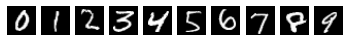

In [7]:
fig = plt.figure()
rows,cols = 1,10
for i in range(10):
  ax1 = fig.add_subplot(rows, cols, i+1)
  ax1.imshow(images[i], cmap='gray')
  ax1.axis("off")
plt.show()

**3. Define Model**

In [8]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

In [9]:
net1 = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
net1.apply(init_weights);

net2 = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
net2.apply(init_weights);

> ### **2. Try two learning rate values and compare the final training loss, test acc, train acc.**

Final train loss : 0.3116


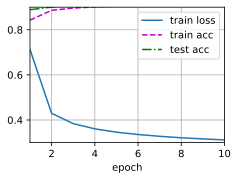

In [10]:
# First - Learning Rate : 0.1
# Takes about 2 min
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net1.parameters(), lr=0.1)
num_epochs = 10
my_train_ch3(net1, train_iter, test_iter, loss, num_epochs, trainer)

In [11]:
# Test Accuracy
print("< Learning Rate : 0.1 >")
for x,y in test_iter:
  pred = net1(x)
  test_pred = torch.argmax(pred, dim=1)
  break

result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net1(x)
  train_pred = torch.argmax(pred, dim=1)
  break

result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

< Learning Rate : 0.1 >
>> Test Accuracy :  94.921875 %
>> Train Accuracy :  86.71875 %


Final train loss : 0.2725


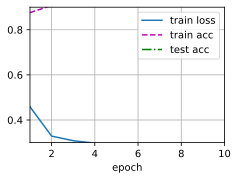

In [12]:
# Second - Learning Rate : 0.5
# Takes about 2 min
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net2.parameters(), lr=0.5)
num_epochs = 10
my_train_ch3(net2, train_iter, test_iter, loss, num_epochs, trainer)

In [13]:
# Test Accuracy
print("< Learning Rate : 0.5 >")
for x,y in test_iter:
  pred = net2(x)
  test_pred = torch.argmax(pred, dim=1)
  break

result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net2(x)
  train_pred = torch.argmax(pred, dim=1)
  break

result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

< Learning Rate : 0.5 >
>> Test Accuracy :  94.53125 %
>> Train Accuracy :  91.40625 %


> ### **3.Try two batch sizes and compare the results.**

Final train loss : 0.2903


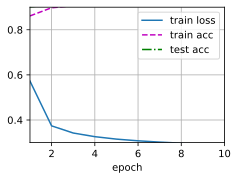

In [18]:
# First - Batch size : 128
# Takes about 2 min
batch_size = 128
train_iter1, test_iter1 = load_data_mnist(batch_size)
net3 = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
net3.apply(init_weights);

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net3.parameters(), lr=0.1)
num_epochs = 10
my_train_ch3(net3, train_iter1, test_iter1, loss, num_epochs, trainer)

In [19]:
# Test Accuracy
print("< Batch size : 128 >")
for x,y in test_iter:
  pred = net3(x)
  test_pred = torch.argmax(pred, dim=1)
  break

result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net3(x)
  train_pred = torch.argmax(pred, dim=1)
  break

result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

< Batch size : 128 >
>> Test Accuracy :  93.75 %
>> Train Accuracy :  91.40625 %


Final train loss : 0.3853


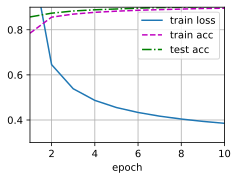

In [20]:
# Second - Batch size : 1024
# Takes about 1 min
batch_size = 1024
train_iter2, test_iter2 = load_data_mnist(batch_size)
net4 = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
net4.apply(init_weights);

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net4.parameters(), lr=0.1)
num_epochs = 10
my_train_ch3(net4, train_iter2, test_iter2, loss, num_epochs, trainer)

In [21]:
# Test Accuracy
print("< Batch size : 1024 >")
for x,y in test_iter:
  pred = net4(x)
  test_pred = torch.argmax(pred, dim=1)
  break

result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net4(x)
  train_pred = torch.argmax(pred, dim=1)
  break

result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

< Batch size : 1024 >
>> Test Accuracy :  92.96875 %
>> Train Accuracy :  90.625 %
